In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

import matplotlib

In [2]:
np.random.seed(5) # keep this seed for a good visual example

x_1 = 10*np.random.rand(10)
x_2 = 10*np.random.rand(10)

features = jnp.vstack((x_1,x_2)).T

x_test = np.array([[8,8],[5,6],[4,2],[9,2]])

In [3]:
class KNN_jax():
    """
    KNN_jax is a version of KNN with jax implemented for calculating distances
    --input-- ground truth data as array of size [n_samples,n_dim], x_test as array of size [n_test,n_dim]
              and k as choosen k value for included nearest neighbours
    """
    def __init__(self,x,x_test,k):
        self.x = x
        self.x_test = x_test
        self.k = k

        self.candidates = None
        self.candidates_idx = None

        self.candid = None
        self.colour = None

        self.y = np.array([1 if (x > 5) and (y < 5 ) else 0 for x ,y in zip(x_1, x_2)])

    def plot_scatter_pre(self):
        # plot all points and new test points to predict from
        # test points are in red
        # set boundaries so that purple points are non scam, and yellow are scam
 
        plt.scatter(self.x[:,0],self.x[:,1], c=self.y)
        plt.title("Scam Email Pre")
        plt.xlabel("Number of Scam Words in Email")
        plt.ylabel("Total Amount of Emails send")
        for _ in self.x_test:
            plt.scatter(_[0],_[1],c="r")
        return plt.show()
    
    @jax.jit
    def euclid(x1,x2):
        """
        calculate simple euclidiean distance
        --input-- two vector arrays
        --ouput-- one vector array
        """
        return jnp.sqrt(jnp.sum((x1-x2)**2,axis=0))

    def nearest(distances,k):
        """
        get k nearest neigbhor values and idices
        --input-- list of distances
        --output-- list of k-nearest-values/idices
        """
        nearest_values = [np.sort(_)[:k] for _ in distances] 
        nearest_idx = [np.argsort(_)[:k] for _ in distances] 
        return nearest_values , nearest_idx
    
    def flow(self):
        """
        determine worklow of data
        """
        dist = jax.vmap(jax.vmap(KNN_jax.euclid,in_axes=(0,None)),in_axes=(None,0))(self.x,self.x_test)
        self.candidates , self.candidates_idx = KNN_jax.nearest(dist,self.k)

    def set_c(value):
        """
        binary method to set correct class colour
        """
        if value == 1:
            return "Yellow"
        else:
            return "Purple"

    def predict(self):
        """
        prediction of test data and aserting corresponding label
        """

        KNN_jax.flow(self)

        self.candid = [ self.y[_] for _ in self.candidates_idx]

        for _ in self.candid:
            abc = np.argmax(np.bincount(_))
            self.colour = KNN_jax.set_c(abc)

    def plot_scatter_post(self):
        """
        plot the scatter after test data has been labeled
        """
        plt.scatter(self.x[:,0],self.x[:,1], c=self.y)
        plt.title("Scam Email Post")
        plt.xlabel("Number of Scam Words in Email")
        plt.ylabel("Total Amount of Emails send")

        for idx, item in enumerate(self.candid):
            abc = np.argmax(np.bincount(item))
            colour = KNN_jax.set_c(abc)
            plt.scatter(x_test[idx][0],x_test[idx][1],c=colour)
    
    def plot_scatter_circ(self):
        """
        plot scatter with test data and corresponding k-nearest neighbors incl. circles
        """
        _, ax = plt.subplots(1,1)
        ax = plt.scatter(self.x[:,0],self.x[:,1],c=self.y)
        ax = plt.gca()
        plt.title("Scam Email k-Circels")
        plt.xlabel("Number of Scam Words in Email")
        plt.ylabel("Total Amount of Emails send")
        for idx, item in enumerate(self.x_test):
            ax = plt.scatter(item[0],item[1],c="r")
            ax = plt.gca()
            for j in self.candidates[idx]:
                ax.add_patch(matplotlib.patches.Circle((item),j,color=plt.cm.RdYlBu(idx*105), fill=False))
                ax.set_aspect("equal")

In [4]:
KNN = KNN_jax(features,x_test,3)

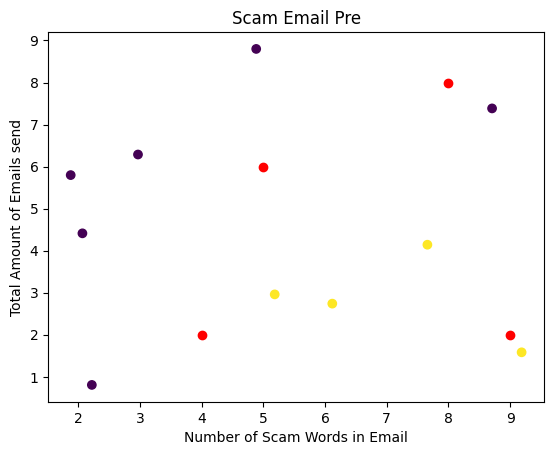

In [5]:
KNN.plot_scatter_pre()

In [6]:
KNN.predict()

c:\Users\kiend\AppData\Local\Programs\Python\Python312\Lib\site-packages\jax\_src\numpy\lax_numpy.py:3961: UserWarning: 'kind' argument to argsort is ignored; only 'stable' sorts are supported.
  warnings.warn("'kind' argument to argsort is ignored; only 'stable' sorts "


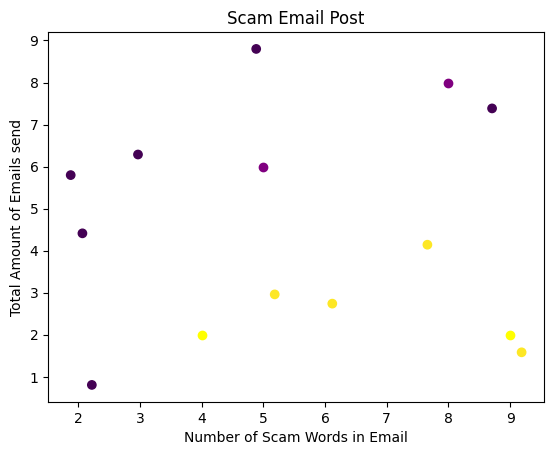

In [7]:
KNN.plot_scatter_post()

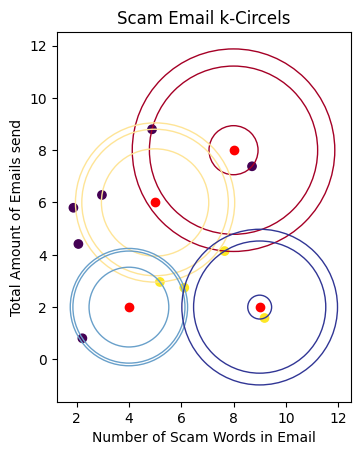

In [8]:
KNN.plot_scatter_circ()